In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# === CONFIGURACIÓN ===
res10000 = pd.read_csv('resultados_10000x5_1.csv')
archivos = [
    'resultados_10000x5_1.csv',
    'resultados_100000x5.csv',
    'resultados_1000000x5.csv',
    'resultados_10000000x5.csv'
]

# === CARGA TODOS LOS ARCHIVOS EN UN SOLO DATAFRAME ===
df_list = []
for archivo in archivos:
    df = pd.read_csv(archivo)
    df['archivo'] = archivo  # para saber de dónde vino
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

In [6]:
# === Extrae n desde el nombre del archivo ===
df['n'] = df['archivo'].str.extract(r'(\d+)').astype(int)

resumen = df.groupby(['algoritmo', 'n']).agg(
    tiempo_promedio=('tiempo', 'mean'),
    tiempo_std=('tiempo', 'std'),
    iteraciones_promedio=('iteraciones', 'mean'),
    iteraciones_std=('iteraciones', 'std'),
    repeticiones=('iteraciones', 'count')
).reset_index()


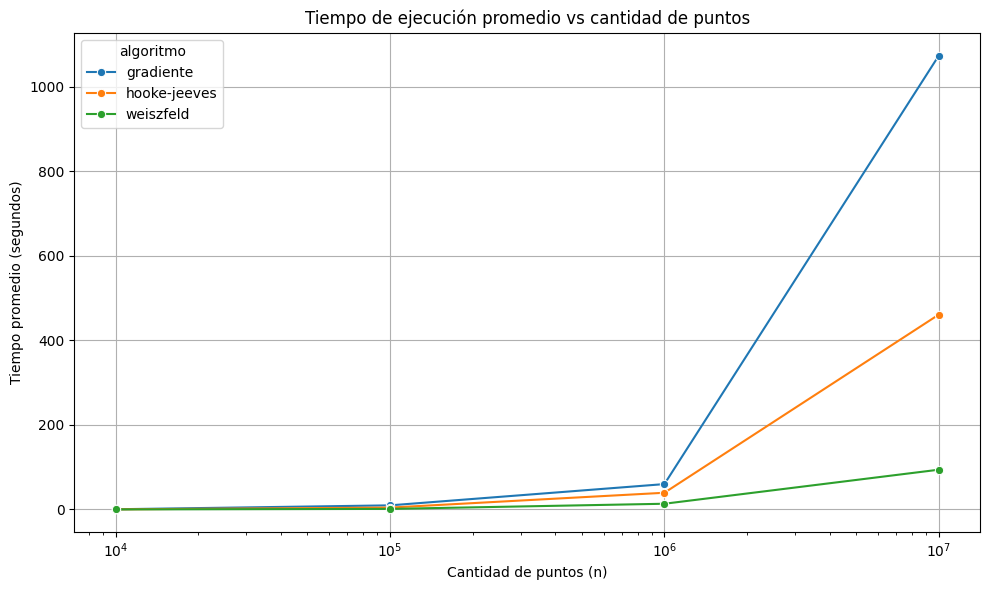

In [7]:
# === GRAFICO 1: Tiempo de ejecución promedio vs n ===
plt.figure(figsize=(10, 6))
sns.lineplot(data=resumen, x='n', y='tiempo_promedio', hue='algoritmo', marker='o')
plt.title('Tiempo de ejecución promedio vs cantidad de puntos')
plt.xlabel('Cantidad de puntos (n)')
plt.ylabel('Tiempo promedio (segundos)')
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

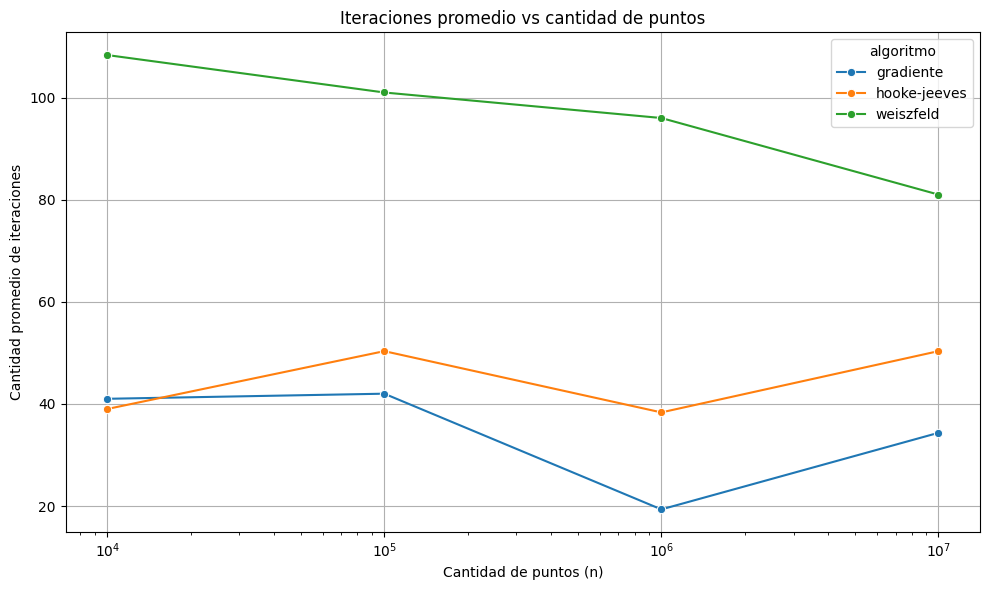

In [8]:
# === GRAFICO 2: Iteraciones promedio vs n ===
plt.figure(figsize=(10, 6))
sns.lineplot(data=resumen, x='n', y='iteraciones_promedio', hue='algoritmo', marker='o')
plt.title('Iteraciones promedio vs cantidad de puntos')
plt.xlabel('Cantidad de puntos (n)')
plt.ylabel('Cantidad promedio de iteraciones')
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

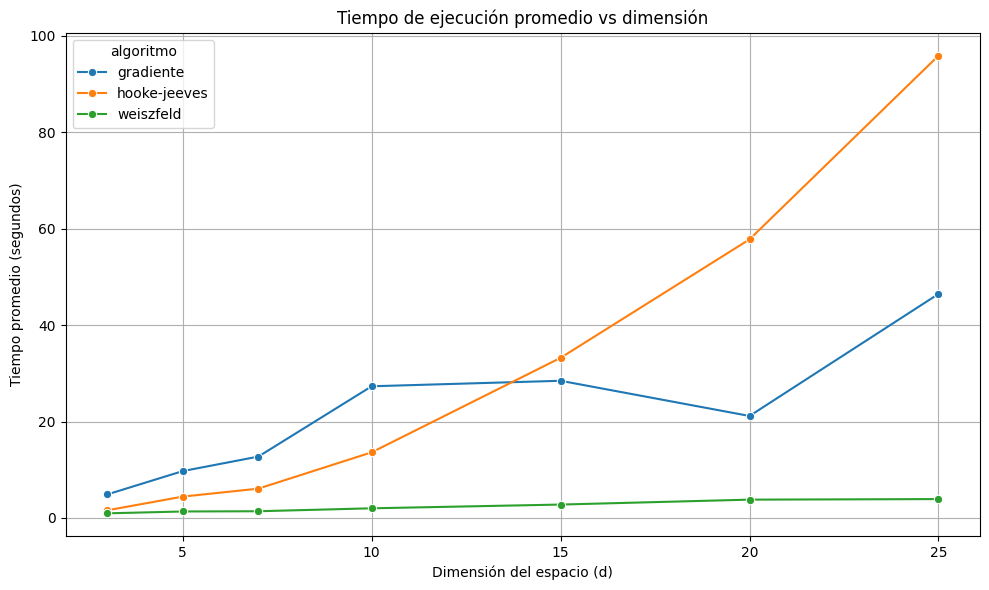

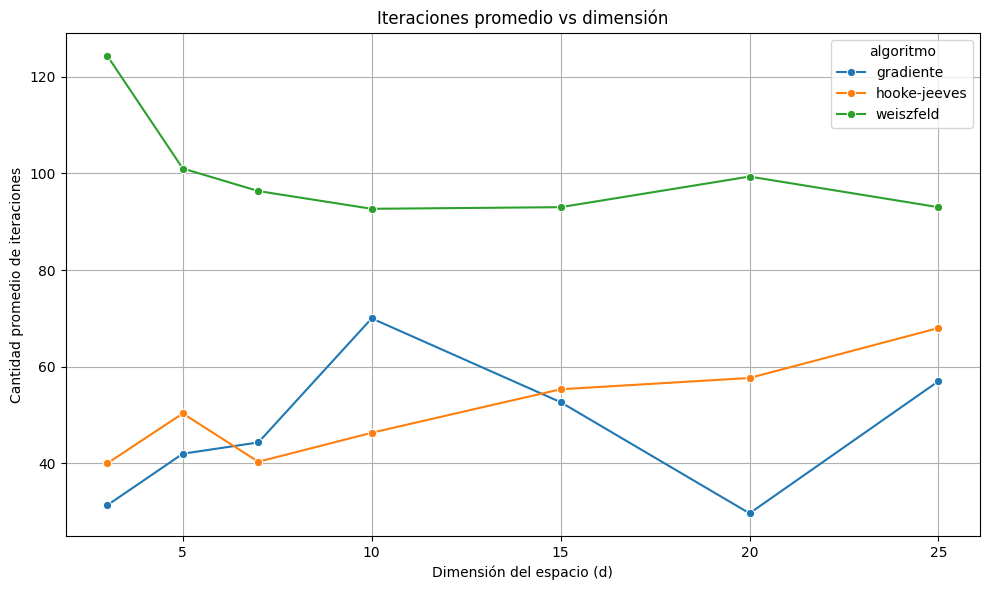

In [28]:
# === ARCHIVOS ===
archivos = [
    'resultados_10000x3.csv',
    'resultados_100000x5.csv',
    'resultados_10000x7.csv',
    'resultados_10000x10.csv',
    'resultados_10000x15.csv',
    'resultados_100000x20.csv',
    'resultados_10000x25.csv'
]

# Cargar todos los CSV
df_list = []
for archivo in archivos:
    df = pd.read_csv(archivo)
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

# Asegurate de que la columna 'd' existe
assert 'd' in df.columns, "La columna 'd' no existe en los CSV. Asegurate de haberla guardado."

# Listo: ya podés agrupar por 'd' directamente
resumen = df.groupby(['algoritmo', 'd']).agg(
    tiempo_promedio=('tiempo', 'mean'),
    tiempo_std=('tiempo', 'std'),
    iteraciones_promedio=('iteraciones', 'mean'),
    iteraciones_std=('iteraciones', 'std'),
    repeticiones=('iteraciones', 'count')
).reset_index()



# === GRAFICO 1: Tiempo promedio vs dimensión ===
plt.figure(figsize=(10, 6))
sns.lineplot(data=resumen, x='d', y='tiempo_promedio', hue='algoritmo', marker='o')
plt.title('Tiempo de ejecución promedio vs dimensión')
plt.xlabel('Dimensión del espacio (d)')
plt.ylabel('Tiempo promedio (segundos)')
plt.grid(True)
plt.tight_layout()
plt.show()

# === GRAFICO 2: Iteraciones promedio vs dimensión ===
plt.figure(figsize=(10, 6))
sns.lineplot(data=resumen, x='d', y='iteraciones_promedio', hue='algoritmo', marker='o')
plt.title('Iteraciones promedio vs dimensión')
plt.xlabel('Dimensión del espacio (d)')
plt.ylabel('Cantidad promedio de iteraciones')
plt.grid(True)
plt.tight_layout()
plt.show()


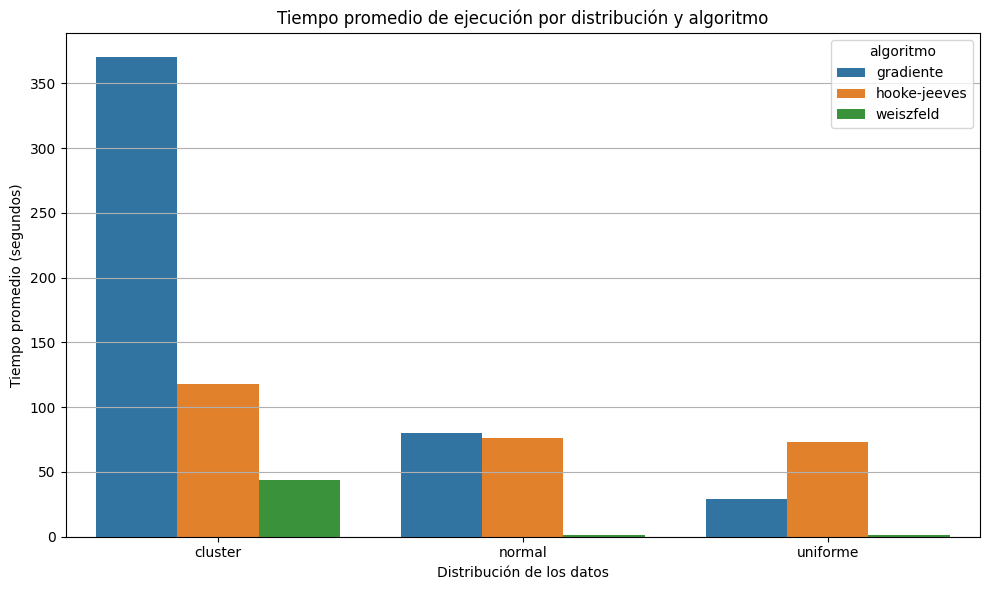

In [36]:
archivos = [
    'resultados_100000x5.csv',
    'resultados_10000x7.csv',
    'resultados_10000x10.csv',
    'resultados_10000x15.csv',
    'resultados_100000x20.csv',
    'resultados_10000x25.csv',
    'resultados_1000000x5.csv',
    'resultados_10000000x5.csv'
]

df_list = []
for archivo in archivos:
    df = pd.read_csv(archivo)
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

# Asegurarse de que la columna 'distribucion' exista
assert 'distribucion' in df.columns, "Falta la columna 'distribucion' en tus CSV."

# Agrupar por algoritmo y distribución, calcular promedio
resumen = df.groupby(['algoritmo', 'distribucion']).agg(
    tiempo_promedio=('tiempo', 'mean'),
    tiempo_std=('tiempo', 'std'),
    repeticiones=('tiempo', 'count')
).reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=resumen, x='distribucion', y='tiempo_promedio', hue='algoritmo')
plt.title('Tiempo promedio de ejecución por distribución y algoritmo')
plt.ylabel('Tiempo promedio (segundos)')
plt.xlabel('Distribución de los datos')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()